# LetsGrowMore DataScience Intern

# Task 2 - Stock Market Prediction and Forecasting using Stack 

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import seaborn as sns

# Loading Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.shape

(2035, 8)

In [6]:
#Sorting the data with respect to date
data = data.sort_values(by='Date');

In [7]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [8]:
data.shape

(2035, 8)

In [9]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
data.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
...          ...     ...     ...     ...     ...     ...   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   

      Total Trade Quantity  Turnover (Lacs)  
2034                658666           803.56  
2033                293312           355.17  
2032                281312           340.31  
2031                658440           780.01  
2030             

In [11]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [12]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2030,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [14]:
data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


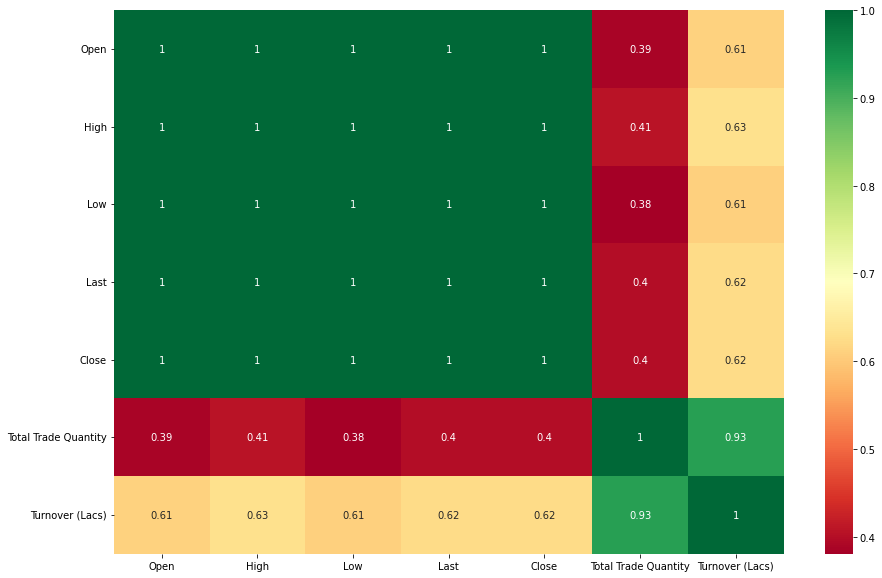

In [15]:
corr_matrix = data.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(15,10))
g = sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Last'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Total Trade Quantity'}>],
       [<AxesSubplot:title={'center':'Turnover (Lacs)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

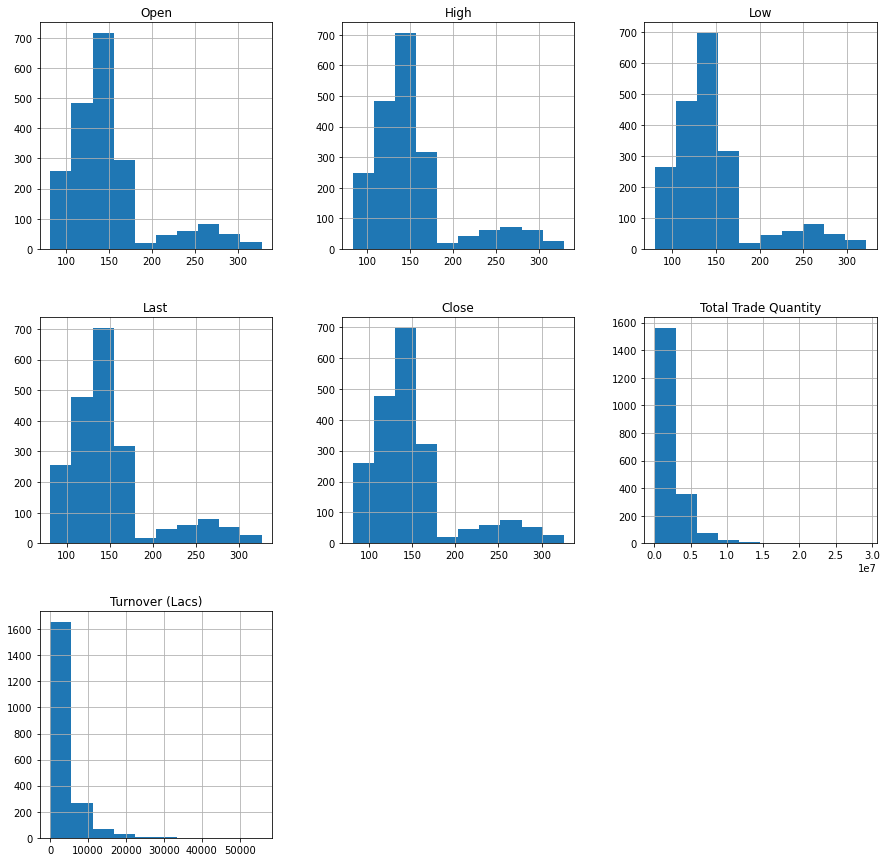

In [16]:
data.hist(figsize=(15,15))

In [17]:
df = data.reset_index()['Close']
df.shape

(2035,)

In [18]:
df.tail()

2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, dtype: float64

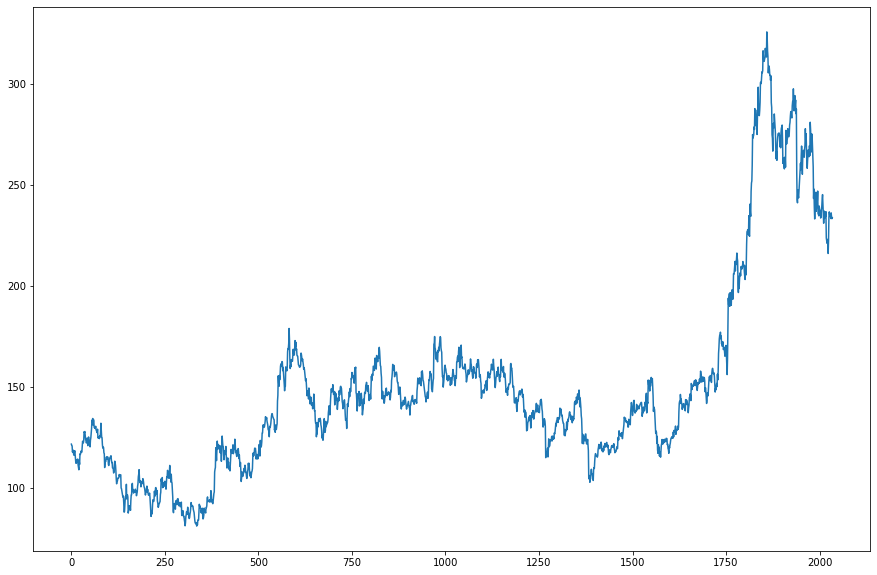

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(df)
plt.show()

# Applying MinMaxScaler to Scale the data

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(df).reshape(-1,1))

scaled_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [26]:
scaled_data.shape

(2035, 1)

# Splitting Dataset into training and testing sets

In [30]:
test_size = int(len(scaled_data)*0.25)
train_size = len(scaled_data) - test_size
train_size , test_size

(1527, 508)

In [31]:
train_data = scaled_data[0:train_size, :]

In [33]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.25020425],
       [0.23999183],
       [0.22201797]])

In [32]:
test_data = scaled_data[train_size: len(scaled_data),:1]

In [34]:
test_data

array([[0.23080065],
       [0.22896242],
       [0.24060458],
       [0.24080882],
       [0.23304739],
       [0.23325163],
       [0.23672386],
       [0.25102124],
       [0.24387255],
       [0.25980392],
       [0.26879085],
       [0.22896242],
       [0.23958333],
       [0.25081699],
       [0.24857026],
       [0.29554739],
       [0.28574346],
       [0.2871732 ],
       [0.28880719],
       [0.27328431],
       [0.29513889],
       [0.28308824],
       [0.28982843],
       [0.30085784],
       [0.29166667],
       [0.29227941],
       [0.29861111],
       [0.28206699],
       [0.26327614],
       [0.23202614],
       [0.24101307],
       [0.23876634],
       [0.23549837],
       [0.22058824],
       [0.20588235],
       [0.1875    ],
       [0.19219771],
       [0.18995098],
       [0.16727941],
       [0.1815768 ],
       [0.15400327],
       [0.14726307],
       [0.16482843],
       [0.15379902],
       [0.15992647],
       [0.14174837],
       [0.14848856],
       [0.149

In [39]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(train_size), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
       0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
       0.14522059, 0.13521242, 0.12724673, 0.13031046, 0.12806373,
       0.13459967, 0.12908497, 0.13562092, 0.12377451, 0.1190768 ,
       0.11397059, 0.13112745, 0.12479575, 0.14603758, 0.14501634,
       0.14726307, 0.15196078, 0.1503268 , 0.14971405, 0.16156046,
       0.17177288, 0.1693219 , 0.16830065, 0.17238562, 0.19097222,
       0.18913399, 0.19138072, 0.18382353, 0.17544935, 0.17279412,
       0.16830065, 0.17034314, 0.17810458, 0.16973039, 0.16278595,
       0.17401961, 0.18035131, 0.17422386, 0.17116013, 0.16564542,
       0.16033497, 0.17381536, 0.17851307, 0.18811275, 0.19750817,
       0.21425654, 0.21098856, 0.21772876, 0.20445261, 0.21568627])]
[0.21282679738562094]

[array([0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
       0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
       0.14522059, 0.13521242, 0.12

In [64]:
x_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.21772876],
        [0.20445261],
        [0.21568627]],

       [[0.16319444],
        [0.1621732 ],
        [0.14971405],
        ...,
        [0.20445261],
        [0.21568627],
        [0.2128268 ]],

       [[0.1621732 ],
        [0.14971405],
        [0.15400327],
        ...,
        [0.21568627],
        [0.2128268 ],
        [0.1997549 ]],

       ...,

       [[0.19281046],
        [0.18607026],
        [0.18811275],
        ...,
        [0.24775327],
        [0.24836601],
        [0.25020425]],

       [[0.18607026],
        [0.18811275],
        [0.18443627],
        ...,
        [0.24836601],
        [0.25020425],
        [0.25020425]],

       [[0.18811275],
        [0.18443627],
        [0.18280229],
        ...,
        [0.25020425],
        [0.25020425],
        [0.23999183]]])

In [41]:
y_train

array([0.2128268 , 0.1997549 , 0.19873366, ..., 0.25020425, 0.23999183,
       0.22201797])

In [70]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[train_size - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = []
dataset = data.values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i,0])
# Convert the data to a numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [71]:
x_test

array([[[0.18443627],
        [0.18280229],
        [0.18464052],
        ...,
        [0.25020425],
        [0.23999183],
        [0.22201797]],

       [[0.18280229],
        [0.18464052],
        [0.18178105],
        ...,
        [0.23999183],
        [0.22201797],
        [0.23080065]],

       [[0.18464052],
        [0.18178105],
        [0.18913399],
        ...,
        [0.22201797],
        [0.23080065],
        [0.22896242]],

       ...,

       [[0.74754902],
        [0.76960784],
        [0.7495915 ],
        ...,
        [0.62765523],
        [0.62234477],
        [0.63378268]],

       [[0.76960784],
        [0.7495915 ],
        [0.81719771],
        ...,
        [0.62234477],
        [0.63378268],
        [0.62622549]],

       [[0.7495915 ],
        [0.81719771],
        [0.80208333],
        ...,
        [0.63378268],
        [0.62622549],
        [0.62214052]]])

In [72]:
y_test.shape

(508,)

In [73]:
y_test

array([0.23080065, 0.22896242, 0.24060458, 0.24080882, 0.23304739,
       0.23325163, 0.23672386, 0.25102124, 0.24387255, 0.25980392,
       0.26879085, 0.22896242, 0.23958333, 0.25081699, 0.24857026,
       0.29554739, 0.28574346, 0.2871732 , 0.28880719, 0.27328431,
       0.29513889, 0.28308824, 0.28982843, 0.30085784, 0.29166667,
       0.29227941, 0.29861111, 0.28206699, 0.26327614, 0.23202614,
       0.24101307, 0.23876634, 0.23549837, 0.22058824, 0.20588235,
       0.1875    , 0.19219771, 0.18995098, 0.16727941, 0.1815768 ,
       0.15400327, 0.14726307, 0.16482843, 0.15379902, 0.15992647,
       0.14174837, 0.14848856, 0.1499183 , 0.13950163, 0.15339052,
       0.16339869, 0.16748366, 0.1752451 , 0.16727941, 0.16584967,
       0.1744281 , 0.17340686, 0.1689134 , 0.1752451 , 0.17544935,
       0.17320261, 0.17320261, 0.17075163, 0.17769608, 0.17708333,
       0.17708333, 0.16462418, 0.16605392, 0.15706699, 0.15482026,
       0.14726307, 0.16176471, 0.15788399, 0.16401144, 0.16768

# Making of the LSTM model for Stock Prediction

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [75]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1467/1467 [==============================] - 29s 18ms/step - loss: 9.1132e-04


# Predicting training and test data

In [78]:
train_pred = scaler.inverse_transform(model.predict(x_train))
test_pred = scaler.inverse_transform(model.predict(x_test))

In [82]:
print("---- Training set - Model Evaluation ----")
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.metrics import r2_score
print("Mean Absolute Error (MAE): {}".format(mae(y_train,train_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_train, train_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_train, train_pred))))

---- Training set - Model Evaluation ----
Mean Absolute Error (MAE): 130.55062475245725
Mean Squared Error (MSE): 17503.067951487836
Root Mean Squared Error (RMSE): 132.2991608117294


In [84]:
print("---- Testing set - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test,test_pred)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, test_pred)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, test_pred))))

---- Testing set - Model Evaluation ----
Mean Absolute Error (MAE): 195.85446496505782
Mean Squared Error (MSE): 41300.692077112944
Root Mean Squared Error (RMSE): 203.22571706630276


C:\conda_tmp/ipykernel_22184/2075312182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = model.predict(x_test)


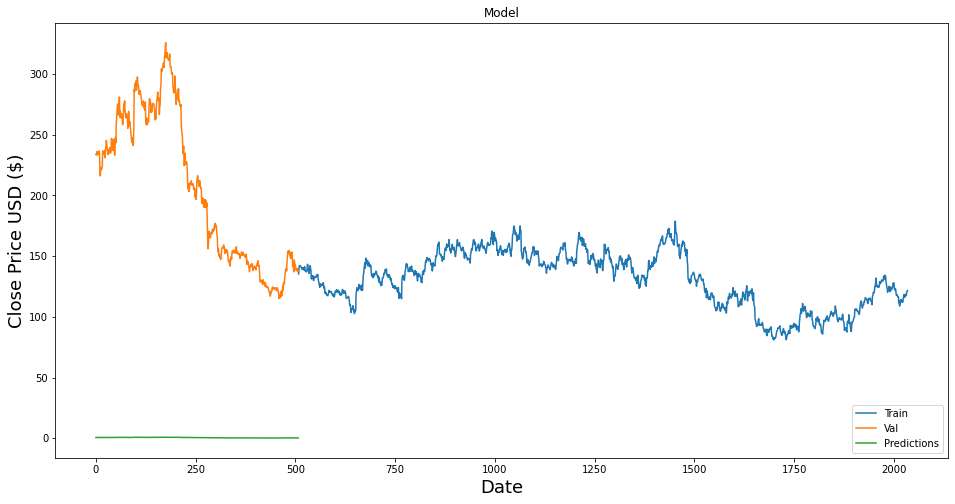

In [108]:
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = model.predict(x_test)
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [119]:
X_input = test_data[468:].reshape(1,-1)
X_input.shape

(1, 100)

In [120]:
temp = list(X_input)
temp = temp[0].tolist()
temp

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

# Predictions for next 10 Days

In [124]:
list_output = []
num_steps=100

i = 0
while (i < 10):
    if(len(temp) > 100):
        X_input = np.array(temp[1:])
        print("Day {} input {}".format(i, X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print("Day {} output {}".format(i, yhat))
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        list_output.extend(yhat.tolist())
        i = i + 1
    else:
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        list_output.extend(yhat.tolist())
        i = i + 1

print(list_output)

Day 0 input [0.74673203 0.75490196 0.76041667 0.75980392 0.74652778 0.76245915
 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562
 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902
 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869
 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902
 0.68198529 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935
 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444
 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464
 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163
 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098
 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392
 0.58006536 0.57618464 0.55167484 0.57883987 0.625      0.63582516
 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549
 0.62214052 0.62418301 0.58470321 0.5761739  0.56522757 0.5533967
 0.54146552 0.52982873 0.51867872 0.50809979 0.49811

Day 9 output [[0.37100485]]
[[0.41319403052330017], [0.4079347550868988], [0.40284058451652527], [0.3978992998600006], [0.3931007385253906], [0.3884366750717163], [0.3839004933834076], [0.3794861435890198], [0.37518900632858276], [0.3710048496723175]]
